# CDS: Numerical Methods - Assignment 2

#### See lecture notes and documentation on Brightspace for Python and Jupyter basics. If you are stuck, try to google or get in touch via Discord!

- Solutions must be submitted via Brightspace as a Jupyter notebook (\*.ipynb) before **Wednesday, February 10, 8:30 CET.**

### Handing-in:

1. Click "Kernel -> Restart & Run All"
2. Check all outputs (In[\*] or Out[\*]) for errors and **resolve them if necessary**
3. Click again "Kernel -> Restart & Run All"
4. Save as assignment_02_TEAM-NUMBER.ipynb by clicking "File -> Save as ..."
5. Download your assignment_\*.ipynb file
6. Upload it **in time (before the deadline)** to Brightspace

## 1. Polynomial Interpolation

In the following you will construct the interpolating polynomial for the pairs $x_k = [2,3,4,5,6]$ and $y_k = [2,5,5,5,6]$ using the "inversion method" via the Vandermonde matrix, as discussed in the lecture.

### Task 1.1

Set up the Vandermonde matrix and calculate its determinant using $\text{numpy.linalg.det()}$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ipytest
ipytest.autoconfig()
x = np.array([2,3,4,5,6])
y = np.array([2,5,5,5,6])
vandermonde_matrix = np.vander(x)
det = np.linalg.det(vandermonde_matrix)
print(vandermonde_matrix)
print(f'\nThe determinant of the Vandermonde Matrix is: {det}')


[[  16    8    4    2    1]
 [  81   27    9    3    1]
 [ 256   64   16    4    1]
 [ 625  125   25    5    1]
 [1296  216   36    6    1]]

The determinant of the Vandermonde Matrix is: 288.0000000000049


### Task 1.2

Write a function that constructs the interpolating polynomial for $\text{x}$ (a user-defined array of $x$ values) using the Vandermonde matrix from the previous task and $\text{numpy.linalg.inv()}$.

In [2]:
def poly(x, y):
    vandermonde_matrix = np.vander(x)
    vand_inv = np.linalg.inv(vandermonde_matrix)
    poly_terms = np.dot(vand_inv, y)
    return poly_terms
    

terms = poly(x,y)
    


### Task 1.3

Plot the interpolating polynomial from $x=2$ to $x=6$ using $x$-step-sizes of $0.01$.

Text(0, 0.5, 'y')

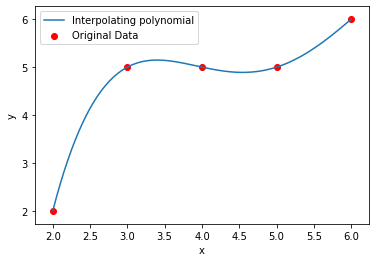

In [3]:
x_inter = np.linspace(2,6, 400)
y_inter = np.sum([terms[i] * x_inter**(4-i) for i in range(5)], axis = 0)


plt.plot(x_inter, y_inter, label = 'Interpolating polynomial')
plt.scatter(x,y, label = 'Original Data', c ='red')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')


## 2. Lagrange Polynomial Interpolation

### Task 2.1

Write your own Lagrange polynomial interpolation routine which calculates 

$$P(x) = \sum_{k=0}^n f(x_k) L_{n,k}(x)$$

Start with a function $\text{myLagrange(xk, yk, x)}$ which internally calls another function $\text{myLagrangePolynomials(xk, k, x)}$ that generates the Lagrange interpolation polynomials 

$$L_{n,k}(x) = \prod_{\substack{i=0 \\ i\neq k}}^n \frac{x-x_i}{x_k - x_i}$$

Here $\text{xk}$ and $\text{yk}$ are arrays of the same size representing the $(x_k, y_k=f(x_k))$ pairs which we like to interpolate and $\text{x}$ is a user-defined array of $x$ values. 

In [4]:
def myLagrangePolynomials(xk, k, x):
    L = np.ones(np.size(x), dtype=np.float64)
    
    for i in range(np.size(xk)):
        if i != k:
            L *= (x-xk[i])/(xk[k] - xk[i])
         
    return L

def myLagrange(xk, yk, x):
    p = np.zeros(np.size(x), dtype=np.float64)
    
    for k in range(np.size(xk)):
        p += yk[k] * myLagrangePolynomials(xk, k, x)
    
    
    return p



### Task 2.2

Use your Lagrange interpolation routine to construct the interpolating polynomial for the pairs $x_k = [2,3,4,5,6]$ and $y_k = [2,5,5,5,6]$ and plot it from $x=2$ to $x=6$ using $x$-step-sizes of $0.01$.

Text(0, 0.5, 'y')

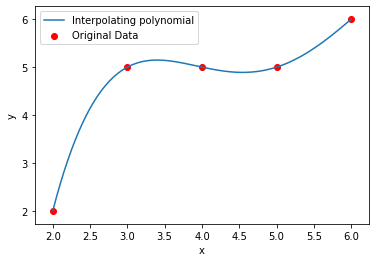

In [5]:
xk = np.array([2,3,4,5,6])
yk = np.array([2,5,5,5,6])
x_inter_L = np.linspace(2,6, 400)
y_inter_L = myLagrange(xk, yk, x_inter)

plt.plot(x_inter_L, y_inter_L, label = 'Interpolating polynomial')
plt.scatter(x,y, label = 'Original Data', c ='red')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')


### Task 2.3

Make sure your result is identical to the one obtained from Scipy's Lagrange function $\text{scipy.interpolate.lagrange()}$ and to the results obtained in Task 1.3. Plot all results in the same figure.

Text(0, 0.5, 'y')

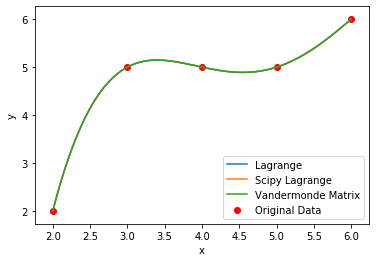

In [6]:
from scipy import interpolate 
y_inter_sp = interpolate.lagrange(xk, yk)(x_inter)


plt.plot(x_inter_L, y_inter_L, label = 'Lagrange')
plt.plot(x_inter, y_inter_sp, label = 'Scipy Lagrange')
plt.plot(x_inter, y_inter, label = 'Vandermonde Matrix')
plt.scatter(x,y, label = 'Original Data', c ='red')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')




### Task 2.4

Implement a simple unit test to test your routine using the $\text{ipytest}$ package, see https://github.com/chmp/ipytest (or for the original $\text{pytest}$ package https://docs.pytest.org/en/latest/). More details will follow in the hands-on session.

In [7]:
def ip(x_k,y_k,x_input):
    vd = np.vander(x_k)
    a_k=np.dot(np.linalg.inv(vd),y_k)[::-1]
    y=np.empty_like(x_input)
    for i, x in enumerate(x_input):
        y[i]=np.sum(a_k*x**np.arange(len(a_k)))
    return y

In [8]:
%%run_pytest[clean]

 #These three test functions test if the values of all three methods are indeed equal
def test_equal():
    assert np.allclose(y_inter, y_inter_sp,rtol=1e-10,atol=1e-12, equal_nan=False)
    
def test_equal2():
    assert np.allclose(y_inter, y_inter_L,rtol=1e-10,atol=1e-12, equal_nan=False)
    
def test_equal3():
    assert np.allclose(y_inter_sp, y_inter_L,rtol=1e-10,atol=1e-12, equal_nan=False)

  
 #These two functions test if the values are equal to the pre-determined value 

def test_myAdder_1():
    x_k = np.array([2,3,4,5,6])
    y_k = np.array([2,5,5,5,6])
    x = np.arange(2,6,0.01)

    myResult = ip(x_k, y_k, x)[0]
    correctResult = 2
    
    assert np.allclose(myResult, correctResult,
                       rtol=1e-10,
                       atol=1e-12,
                       equal_nan=False)
    
def test_myAdder_2():
    x_k = np.array([2,3,4,5,6])
    y_k = np.array([2,5,5,5,6])
    x = np.arange(2,6,0.01)

    myResult = myLagrange(x_k, y_k, x)[0]
    correctResult = 2
    
    assert np.allclose(myResult, correctResult,
                       rtol=1e-10,
                       atol=1e-12,
                       equal_nan=False)

.....                                                                    [100%]
5 passed in 0.09s


### [Optional] Task 2.5

Compare the execution timings from all three methods using IPython's $\text{%timeit}$ magic command.

In [9]:
%%timeit
def poly(x, y):
    vandermonde_matrix = np.vander(x)
    vand_inv = np.linalg.inv(vandermonde_matrix)
    poly_terms = np.dot(vand_inv, y)
    return poly_terms
    

terms = poly(x,y)
x_inter = np.linspace(2,6, 400)
y_inter = np.sum([terms[i] * x_inter**(4-i) for i in range(5)], axis = 0)

288 µs ± 2.18 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [10]:
%%timeit
xk = np.array([2,3,4,5,6])
yk = np.array([2,5,5,5,6])
x_inter_L = np.linspace(2,6, 400)
y_inter_L = myLagrange(xk, yk, x_inter_L)

467 µs ± 970 ns per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [11]:
%%timeit
y_inter_sp = interpolate.lagrange(xk, yk)(x_inter)



2.2 ms ± 5.82 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


### IPyTest example

In [12]:
# load ipytest
import ipytest
ipytest.autoconfig()

In [13]:
%%run_pytest[clean]

# Note 1: Tests must be in a separate cell, starting with %%run_pytest.
# Note 2: There cannot be any comments BEFORE the %%run_pytest !!

def test_example():
    assert [1, 2, 3] == [1, 2, 3]

.                                                                        [100%]
1 passed in 0.05s


## 3. Runge's Phenomenom

Use your own Lagrange interpolation routine to interpolate the function 

$$f(x) = \frac{1}{1+25x^2}$$ 

between $x=-1$ and $x=+1$, using the $\text{xk}$ below. Plot the results and briefly discuss their differences.

### Task 3.1

Use equidistant $x_k = \frac{2k}{n} - 1$ with $k \in \{0, 1, \dots, n  \}$.

Text(0, 0.5, 'y')

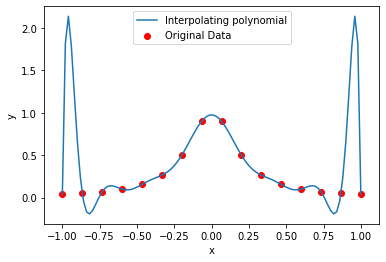

In [14]:
n = 15
xk = np.array([2*k/n - 1 for k in range(n+1)])
yk = 1/(1+25*xk**2)

x_inter_L = np.linspace(-1,1, 100)
y_inter_L = myLagrange(xk, yk, x_inter_L)

plt.plot(x_inter_L, y_inter_L, label = 'Interpolating polynomial')
plt.scatter(xk,yk, label = 'Original Data', c ='red')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')


### Task 3.2

Use Chebychev nodes $x_k = \operatorname{cos}\left(\frac{2k-1}{2n}\pi \right)$ with $k \in \{1, \dots, n  \}$.

Text(0, 0.5, 'y')

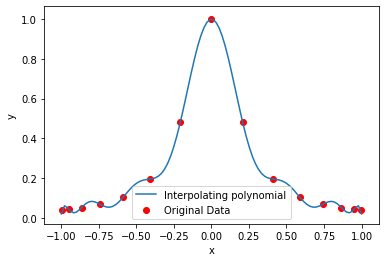

In [15]:
n = 15
xk = np.array([np.cos((2*k-1)/(2*n)*np.pi) for k in range(1,n+1)])
yk = 1/(1+25*xk**2)

x_inter_L = np.linspace(-1,1, 100)
y_inter_L = myLagrange(xk, yk, x_inter_L)

plt.plot(x_inter_L, y_inter_L, label = 'Interpolating polynomial')
plt.scatter(xk,yk, label = 'Original Data', c ='red')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')

### Task 3.3

Use $n$ randomly chosen points $x_k$.

Text(0, 0.5, 'y')

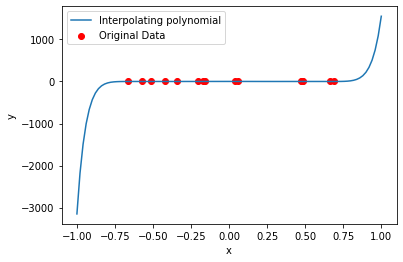

In [16]:
n = 15
xk = np.random.rand(n)*2-1
yk = 1/(1+25*xk**2)

x_inter_L = np.linspace(-1,1, 100)
y_inter_L = myLagrange(xk, yk, x_inter_L)

plt.plot(x_inter_L, y_inter_L, label = 'Interpolating polynomial')
plt.scatter(xk,yk, label = 'Original Data', c ='red')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')

# Conclusion
It is easy to see the difference between these three graphs. The first one grants a pretty decent fit at a low n value, but starts to behave worse at a high n value, as the polynomial value of the graph near -1 and 1 shoot to infinity. 

The third graph has the same problem, it almost never gives a good polynomial fit of the function at any n value. 

The second distribution of points works the best for all values of n. This makes it clear that the distribution of datapoints has a large contribution to the Lagrangian polynomial fit. 

# Weekly Reflection

- How do you judge the level of the last lecture on a scale from 1 to 5?
- with: 1: easy to follow, 3: OK to follow, 5: too complicated to follow

- How long did it take you to complete this assignment?

- How hard was it to finish this assignment on a scale from 1 to 5?
- with: 1: easy / no help needed, 3: could solve with guidance, 5: could not solve it